In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

df3h = df.resample('3H').mean()
df6h = df.resample('6H').mean()
df12h = df.resample('12H').mean()
df1d = df.resample('1D').mean()
df1w = df.resample('1W').mean()
df1mon = df.resample('1M').mean()

In [34]:
df6h.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 06:00:00,3673.861523,0.0,4072.480957,0.0,186.836438,0.0,4419.094434,0.015332,281.393336,20.4,...,1012.963334,41.733333,0.00,0.000000,6.500000,6.006667,5.606667,93.433333,11542.000000,13.166667
2017-03-07 12:00:00,3674.841146,0.0,4072.480957,0.0,235.815562,0.0,4419.693685,0.295329,294.558335,0.0,...,1015.911112,261.277778,0.00,4.474564,8.402778,9.088889,5.422222,81.166667,25180.555556,3.777778
2017-03-07 18:00:00,3678.227783,0.0,4072.904867,0.0,863.223114,0.0,4422.108968,0.262858,258.399999,0.0,...,1018.480552,12.861111,0.00,0.833333,6.569444,6.088889,3.905556,82.722222,21413.888889,2.222222
2017-03-08 00:00:00,3679.565837,0.0,4073.907471,0.0,175.935211,0.0,4424.038411,0.189941,184.483611,0.0,...,1017.842499,0.000000,0.00,0.000000,4.818056,3.823611,3.146667,88.422222,11923.888889,5.083333
2017-03-08 06:00:00,3680.262492,0.0,4075.163086,0.0,296.004306,0.0,4426.966878,0.506470,169.913889,429.0,...,1012.897227,15.388889,1.45,0.000000,5.708333,5.363889,4.236111,89.805556,9449.722222,49.027778


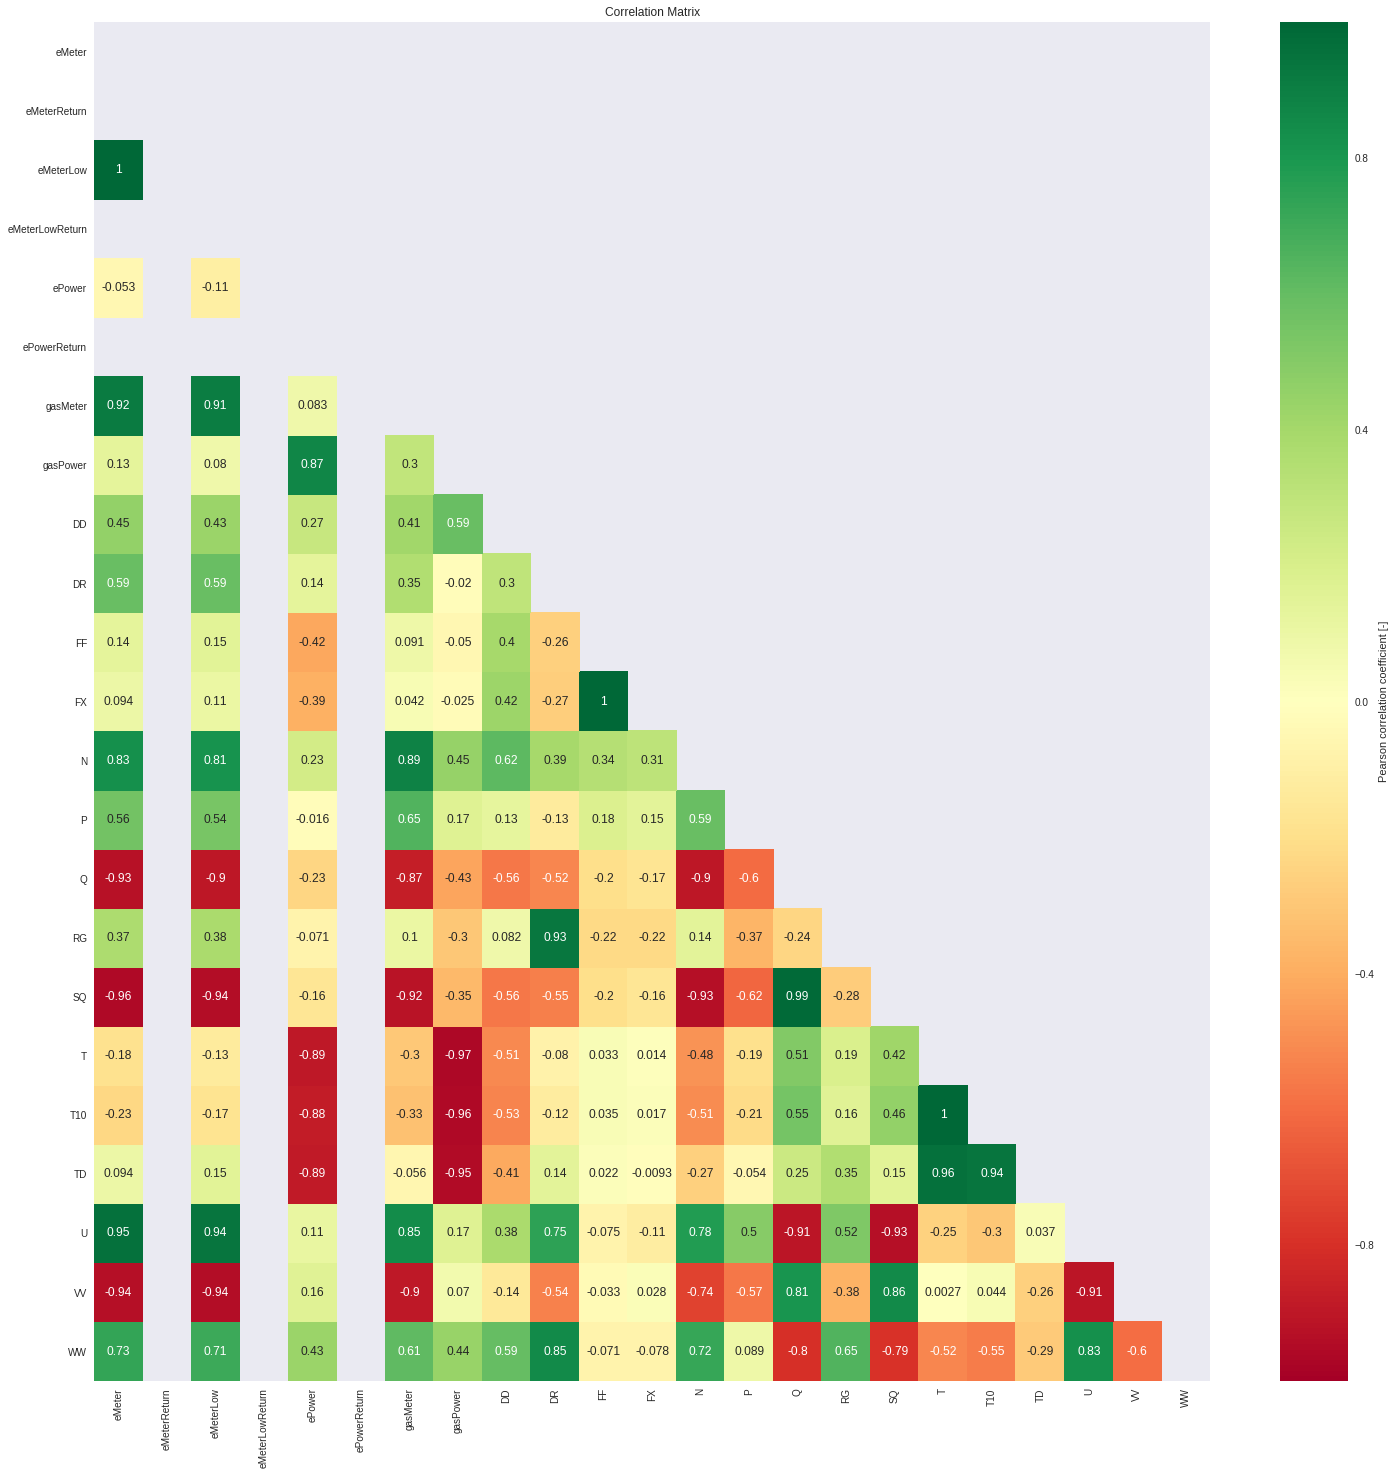

In [45]:
corr = df1mon.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('sample.png', dpi=500)
plt.show()


In [ ]:
results = []
for i in range(len(df/24)):
    corr = df[(i*24+0):(i*24+24)].corr()
    results.append(corr[['gasPower']])

for d in range(len(results)):
    results[d] = results[d].T
    
frames = (results[:])
resultaat = pd.concat(frames)